## LAB 1 - Introductory Lab - notebook version

This R script is partially based on the 'Introductory Lab' 
from the Social Network Analysis course at Stanford University
(available at: https://sna.stanford.edu/lab.php?l=1)

The objectives of this lab are to:
- introduce the *igraph* R package          
- load and manage network data
- create and explore graph objects
- generate network visualizations
- export the network (graph) data for use in  
  subsequent analysis

#### 0. IGRAPH R PACKAGE

In this and all subsequent labs, we will use the *igraph* R package, one of the most popular R packages for SNA.
The official manual is available at: http://cran.r-project.org/web/packages/igraph/igraph.pdf
also at: http://igraph.org/r/

There is also an excellent tutorial for R and igraph beginners available at: http://kateto.net/networks-r-igraph
It starts with introduction (reminder) of basic R constructs and then proceeds to cover igraph; it offers a detailed coverage of igraph functionalities in an easy to follow, step-by-step manner. 


If you haven't used the *igraph* package before, you'll have to install it first:
```install.packages('igraph')```

In [1]:
#install.packages("igraph")

In [1]:
2+3

[1] 5

This and the following labs use the current version of igraph which is 1.2.6. To check your version type:

In [2]:
packageVersion('igraph')

[1] '1.2.6'

The installation is done only once, but you'll have to load the package each time you need to use it:

In [3]:
library(igraph)

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



Sometimes, different packages overlap in functionality and cause unexpected behavior when both are loaded simultaneously.
If you ever want to remove an existing library, use the "detach" command: ```detach(package:igraph)```

#### 1. LOADING NETWORK DATA

We will use David Krackhardt's High-tech Managers Networks data set.
The data were collected from 21 management personnel in a high-tech, machine manufacturing firm to assess the effects of a recent management intervention program.
The data set and its description are available at: 
http://networkdata.ics.uci.edu/netdata/html/krackHighTech.html

We will load edge lists for 3 networks with the same actors (nodes), but different kinds of ties among them:
- advice ties - one actor (ego) tends to ask the other (alter) for advice
- friendship ties - one actor (ego) has named the other actor (alter) as a friend
- reports-to ties - one actor (ego) reports to the other one (alter)
All three networks are directed.

These edge lists are stored in tabular format in **.txt** files.
To read data from those files, we will use the ```read.table()``` function.
read.table() is a common R function for loading data from files in which values are in tabular format. The function loads
the table into a data frame object. By default, R assumes that the table has no header and the values are delimited by any white space; these settings are fine for our purposes here.

One handy aspect of R is that you can read in data from a URL directly by referencing the URL in the read.table() function, as follows: 

In [4]:
advice_data_frame <- read.table('http://sna.stanford.edu/sna_R_labs/data/Krack-High-Tec-edgelist-Advice.txt')
friendship_data_frame <- read.table('http://sna.stanford.edu/sna_R_labs/data/Krack-High-Tec-edgelist-Friendship.txt')
reports_to_data_frame <- read.table('http://sna.stanford.edu/sna_R_labs/data/Krack-High-Tec-edgelist-ReportsTo.txt')

In [5]:
# #If the files you want to work with are on your local machine, you can reference them by the path name:
# advice_data_frame <- read.table('data/Krack-High-Tec-edgelist-Advice.txt')
# friendship_data_frame <- read.table('data/Krack-High-Tec-edgelist-Friendship.txt')
# reports_to_data_frame <- read.table('data/Krack-High-Tec-edgelist-ReportsTo.txt')

In [6]:
# Let's see what these data frames look like
head(advice_data_frame, n=10)
head(friendship_data_frame, 10)
head(reports_to_data_frame, 10)

V1,V2,V3
1,1,0
1,2,1
1,3,0
1,4,1
1,5,0
1,6,0
1,7,0
1,8,1
1,9,0
1,10,0


V1,V2,V3
1,1,0
1,2,1
1,3,0
1,4,1
1,5,0
1,6,0
1,7,0
1,8,1
1,9,0
1,10,0


V1,V2,V3
1,1,0
1,2,1
1,3,0
1,4,0
1,5,0
1,6,0
1,7,0
1,8,0
1,9,0
1,10,0


We can also examine the structure of the data frame:

In [7]:
str(advice_data_frame)

'data.frame':	441 obs. of  3 variables:
 $ V1: int  1 1 1 1 1 1 1 1 1 1 ...
 $ V2: int  1 2 3 4 5 6 7 8 9 10 ...
 $ V3: int  0 1 0 1 0 0 0 1 0 0 ...


For convenience, we can assign more meaningful column names 
to our newly imported data frames:

In [8]:
colnames(advice_data_frame) <- c('ego', 'alter', 'advice_tie')
head(advice_data_frame)

ego,alter,advice_tie
1,1,0
1,2,1
1,3,0
1,4,1
1,5,0
1,6,0


In [9]:
colnames(friendship_data_frame) <- c('ego', 'alter', 'friendship_tie')
head(friendship_data_frame)

ego,alter,friendship_tie
1,1,0
1,2,1
1,3,0
1,4,1
1,5,0
1,6,0


In [10]:
colnames(reports_to_data_frame) <- c('ego', 'alter', 'reports_to_tie')
head(reports_to_data_frame)

ego,alter,reports_to_tie
1,1,0
1,2,1
1,3,0
1,4,0
1,5,0
1,6,0


Let's  take a look at the unique values of each column:

In [11]:
apply(advice_data_frame, 2, unique) 

$ego
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

$alter
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

$advice_tie
[1] 0 1

Note that some actor pairs are not connected at all. Let's check if / how many such cases we have:

In [12]:
sum(advice_data_frame$advice_tie == 0)
sum(friendship_data_frame$friendship_tie == 0)
sum(reports_to_data_frame$reports_to_tie == 0)

[1] 251

[1] 339

[1] 421

Reduce to non-zero edges so that each data frame contains only
actual ties between actors

In [13]:
advice_nonzero_edges <- subset(advice_data_frame, advice_tie > 0)
friend_nonzero_edges <- subset(friendship_data_frame, friendship_tie > 0) 
reports_nonzero_edges <- subset(reports_to_data_frame, reports_to_tie > 0)

Since the values in the weight column are now all equal to 1
this column is no longer informative and thus could be removed

In [14]:
advice_nonzero_edges <- advice_nonzero_edges[,-3]
friend_nonzero_edges <- friend_nonzero_edges[,-3]
reports_nonzero_edges <- reports_nonzero_edges[,-3]

The attribute data for this lab are in a comma-separated-value
(CSV) file. read.csv() loads a CSV file into a data frame object.
We can load csv file from a URL:

In [15]:
attributes <- read.csv('http://sna.stanford.edu/sna_R_labs/data/Krack-High-Tec-Attributes.csv')

In [16]:
# Or we can read from a local file:
# attributes <- read.csv('data/Krack-High-Tec-Attributes.csv')

Check the structure and content of the attributes data frame

In [17]:
str(attributes)

'data.frame':	21 obs. of  4 variables:
 $ AGE   : int  33 42 40 33 32 59 55 34 62 37 ...
 $ TENURE: num  9.33 19.58 12.75 7.5 3.33 ...
 $ LEVEL : int  3 2 3 3 3 3 1 3 3 3 ...
 $ DEPT  : int  4 4 2 4 2 1 0 1 2 3 ...


The attributes set includes: 
- the actors' age (in years), 
- tenure or length of service (in years), 
- level in the corporate hierarchy; this is coded as follows: 
  1=CEO, 2 = Vice President, 3 = manager), 
- department, which is coded 1,2,3,4 with the CEO in department 0 (ie not in any department)

In [18]:
summary(attributes)

      AGE            TENURE           LEVEL            DEPT     
 Min.   :27.00   Min.   : 0.250   Min.   :1.000   Min.   :0.00  
 1st Qu.:33.00   1st Qu.: 7.500   1st Qu.:3.000   1st Qu.:1.00  
 Median :37.00   Median : 9.333   Median :3.000   Median :2.00  
 Mean   :39.71   Mean   :11.746   Mean   :2.714   Mean   :2.19  
 3rd Qu.:43.00   3rd Qu.:12.500   3rd Qu.:3.000   3rd Qu.:3.00  
 Max.   :62.00   Max.   :30.000   Max.   :3.000   Max.   :4.00  

Note that the summaries for the attributes LEVEL and DEPT do not
have much sense, as these are, in essence, factor variables, but
we'll deal with this later.

A few notes regarding loading data from other data storage formats:
1) To read an excel file into R, use, for example, ```readxl``` package

2) With the 'foreign' package you can read a few other custom
data types, such as SPSS or SAS files

3) When data files are part of an R package you can read them as 
follows:
```data(kracknets, package = "NetData")```
This is good to know as R packages often come with a number 
of data sets that can be used for practicing. 

#### 2. CREATING YOUR FIRST SOCIAL GRAPH

Now we can import our data into a graph object using igraph. 
Coercing the data into a graph object is what allows us to 
perform network analysis.

In [19]:
advice_net <- graph_from_data_frame(advice_nonzero_edges) 
summary(advice_net)

IGRAPH 64835e3 DN-- 21 190 -- 
+ attr: name (v/c)


By default, ```graph_from_data_frame()``` treats the first two columns 
of a data frame as an edge list and any remaining columns as 
edge attributes. Thus, the 190 edges appearing in the ```summary()```
output refer to the 190 pairs of vertices that are joined by 
the advice tie. 

To view the adjacency matrix of the graph:

In [20]:
as_adjacency_matrix(advice_net)

   [[ suppressing 21 column names '1', '2', '3' ... ]]


21 x 21 sparse Matrix of class "dgCMatrix"
                                            
1  . 1 . 1 . . . 1 . . . . . . . 1 . 1 . . 1
2  . . . . . 1 1 . . . . . . . . . . . . . 1
3  1 1 . 1 . 1 1 1 1 1 1 1 . 1 . . 1 1 . 1 1
4  1 1 . . . 1 . 1 . 1 1 1 . . . 1 1 1 . 1 1
5  1 1 . . . 1 1 1 . 1 1 . 1 1 . 1 1 1 1 1 1
6  . . . . . . . . . . . . . . . . . . . . 1
7  . 1 . . . 1 . . . . 1 1 . 1 . . 1 1 . . 1
8  . 1 . 1 . 1 1 . . 1 1 . . . . . . 1 . . 1
9  1 1 . . . 1 1 1 . 1 1 1 . 1 . 1 1 1 . . 1
10 1 1 1 1 1 . . 1 . . 1 . 1 . 1 1 1 1 1 1 .
11 1 1 . . . . 1 . . . . . . . . . . . . . .
12 . . . . . . 1 . . . . . . . . . . . . . 1
13 1 1 . . 1 . . . 1 . . . . 1 . . . 1 . . .
14 . 1 . . . . 1 . . . . . . . . . . 1 . . 1
15 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . 1 1 1 1 1 1
16 1 1 . . . . . . . 1 . . . . . . . 1 . . .
17 1 1 . 1 . . 1 . . . . . . . . . . . . . 1
18 1 1 1 1 1 . 1 1 1 1 1 . 1 1 1 1 . . 1 1 1
19 1 1 1 . 1 . 1 . . 1 1 . . 1 1 . . 1 . 1 .
20 1 1 . . . 1 . 1 . . 1 1 . 1 1 1 1 1 . . 1
21 . 1 1 1 .

Note that vertices have the 'name' attribute.

We can access it as follows:

In [21]:
V(advice_net)$name

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21"

where 'V' represents the set of nodes (vertices) of the graph whose name is given in the brackets

Alternatively, we can do the same as:

In [22]:
vertex_attr(advice_net, 'name')

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21"

For later operations, it would be more convenient if the 'name' 
attribute is of integer type. Let's change the type.

For some reason, this will not work:
```{r}
V(advice_net)$name <- as.integer(V(advice_net)$name)
```
So, we have to remove the attribute and add it again, as integer.

In [23]:
advice_net <- delete_vertex_attr(advice_net, 'name')
V(advice_net)$name <- 1:vcount(advice_net)
V(advice_net)$name

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

Since we have node attributes, we can include them in the graph 
when creating the graph object. This can be done by specifying 
the 'vertices' parameter of the ```graph_from_data_frame()``` f.

In [24]:
?graph_from_data_frame 

To make our 'attributes' data frame consistent with the function's
requirements, we need to extend it with a column that represents
the nodes' 'names' (ie. values to be used for the node 'name' 
attribute in the graph). These names have to match the nodes' 
names in the edge list (ie. values of the 'ego' and 'alter' columns
in the advice_nonzero_edges data frame). Since in our case nodes' 
names are simply the nodes' ordinal numbers, the new node_name 
column in the 'attributes' data frame will simply be:

In [25]:
attributes$node_name <- 1:nrow(attributes)

Next, we need to reorder the columns, since the column with the node
name has to be the first one:

In [26]:
str(attributes)
attributes <- attributes[,c(5,1:4)]

'data.frame':	21 obs. of  5 variables:
 $ AGE      : int  33 42 40 33 32 59 55 34 62 37 ...
 $ TENURE   : num  9.33 19.58 12.75 7.5 3.33 ...
 $ LEVEL    : int  3 2 3 3 3 3 1 3 3 3 ...
 $ DEPT     : int  4 4 2 4 2 1 0 1 2 3 ...
 $ node_name: int  1 2 3 4 5 6 7 8 9 10 ...


Now, create the graph. 

In [27]:
advice_net <- graph_from_data_frame(d = advice_nonzero_edges, 
                                       vertices = attributes) 

In [28]:
summary(advice_net)

IGRAPH 656431e DN-- 21 190 -- 
+ attr: name (v/c), AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n)


Note that we now have 'age,' 'tenure,' 'level', and 'dept'
listed alongside 'name' as vertex attributes.

Since the 'name' attribute is again given as character
we'll replace its values with the corresponding integer
values:

In [29]:
advice_net <- delete_vertex_attr(advice_net, 'name')
V(advice_net)$name <- 1:vcount(advice_net)

Examine, for example, the actors' AGE attribute

In [30]:
vertex_attr(advice_net, 'AGE')

[1] 33 42 40 33 32 59 55 34 62 37 46 34 48 43 40 27 30 33 32 38 36

In [31]:
# or
V(advice_net)$AGE

[1] 33 42 40 33 32 59 55 34 62 37 46 34 48 43 40 27 30 33 32 38 36

We can use attribute values to select a subset of nodes
of the network. For example, to select nodes representing 
those who are above 40 years of age:

In [32]:
V(advice_net)[V(advice_net)$AGE > 40]

+ 7/21 vertices, named, from 656431e:
[1] 2  6  7  9  11 13 14

To create a new graph out of the selected nodes:

In [33]:
advice_over40 <- induced_subgraph(advice_net, 
                                  V(advice_net)[V(advice_net)$AGE > 40])
summary(advice_over40)
summary(V(advice_over40)$AGE)

IGRAPH 658d21c DN-- 7 18 -- 
+ attr: AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n), name (v/n)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  42.00   44.50   48.00   50.71   57.00   62.00 

We can also get attribute values for a subset of nodes.
For example, to get the tenure of only those who are 
above 40 years of age:

In [34]:
vertex_attr(advice_net, 'TENURE', V(advice_net)[V(advice_net)$AGE > 40])

[1] 19.583 28.000 30.000  5.417 27.000  0.250 10.417

In [35]:
# or
V(advice_net)$TENURE[V(advice_net)$AGE > 40]

[1] 19.583 28.000 30.000  5.417 27.000  0.250 10.417

Or, we can get the age of employees in the largest department:

In [36]:
table(V(advice_net)$DEPT)
V(advice_net)$AGE[V(advice_net)$DEPT == 2]


0 1 2 3 4 
1 5 8 3 4 

[1] 40 32 62 48 43 40 32 38

#### 3. CREATING MORE GRAPHS

Now, we'll create networks for the other two tie types

In [37]:
# friendship network
friendship_net <- graph_from_data_frame(friend_nonzero_edges,
                                        vertices = attributes)
summary(friendship_net)

IGRAPH 65aeea7 DN-- 21 102 -- 
+ attr: name (v/c), AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n)


Note that the 'name' attribute is again given as character
we'll replace it with the corresponding integer values:

In [38]:
friendship_net <- delete_vertex_attr(friendship_net, 'name')
V(friendship_net)$name <- 1:vcount(friendship_net)

In [39]:
# reports-to network
reports_to_net <- graph_from_data_frame(reports_nonzero_edges,
                                        vertices = attributes)
summary(reports_to_net)
reports_to_net <- delete_vertex_attr(reports_to_net, 'name')
V(reports_to_net)$name <- 1:vcount(reports_to_net)

IGRAPH 65c4389 DN-- 21 20 -- 
+ attr: name (v/c), AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n)


If you would like to symmetrize the network, making all asymmetric
(directed) ties symmetric (undirected), use the as.undirected() function
(check the documentation for the 'mode' parameter).
For example, we can make a friendship network by assuming that if one
person considers another for a friend, the other would automatically reciprocate 

In [40]:
friend_undirect <- as.undirected(friendship_net, mode='collapse')
summary(friend_undirect)

IGRAPH 65cbad9 UN-- 21 79 -- 
+ attr: AGE (v/n), TENURE (v/n), LEVEL (v/n), DEPT (v/n), name (v/n)


#### 4. VISUALIZING NETWORKS

The igraph package allows us to use R's plot() function to generate 
custom visualizations of our networks.

For a full list of igraph plotting parameters see Section 4.1
of the Network visualization in R tutorial:
http://kateto.net/network-visualization

R only lets us look at one plot at a time. To be able to compare
multiple networks, that is, their plots, you may want to save 
each plot in a separate PDF or image file. The code below shows 
how to do that. Alternatively, to just create a plot, execute 
the code between the pdf() / jpeg() function and dev.off().

Assure that you are in the "SNA_Labs" subdirectory:

In [42]:
getwd()
# setwd('SNA_Labs') # Run this line only if getwd() output tells you the subdirectory is not SNA_Labs

[1] "C:/Users/Korisnik/Desktop/social network analysis RDN/SNA 2020/SNA2020-main/SNA_Labs"

First, let's look at the advice network

In [43]:
pdf("graphs/1.1_Krackhardt_Advice.pdf")
plot(advice_net,
     edge.arrow.size=.3,
     main="High-tech Managers Advice Network")
dev.off()

png 
  2

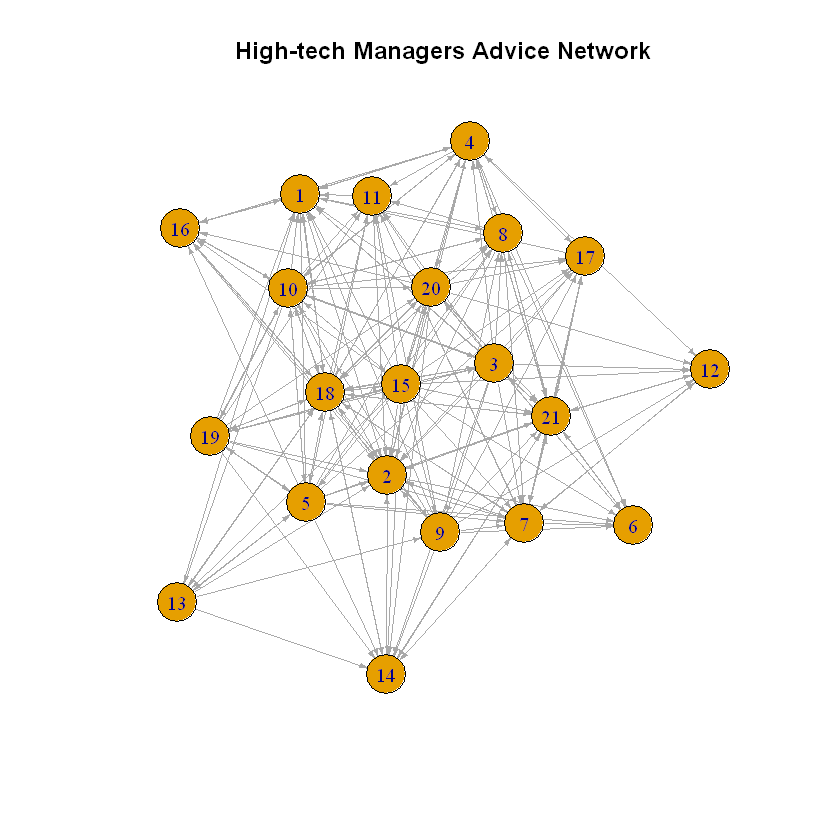

In [44]:
# To only see the plot (without saving):
plot(advice_net,
     edge.arrow.size=.3,
     main="High-tech Managers Advice Network")

Check the documentation of the pdf() function to see
how you can customise the generated PDF document
(e.g. by setting font, paper size, title, etc)

Next, the friendship network

In [45]:
jpeg("graphs/1.2_Krackhardt_Friendship.jpg")
plot(friendship_net,
     edge.arrow.size=.3,
     main="High-tech Managers Friendship Network")
dev.off()

png 
  2

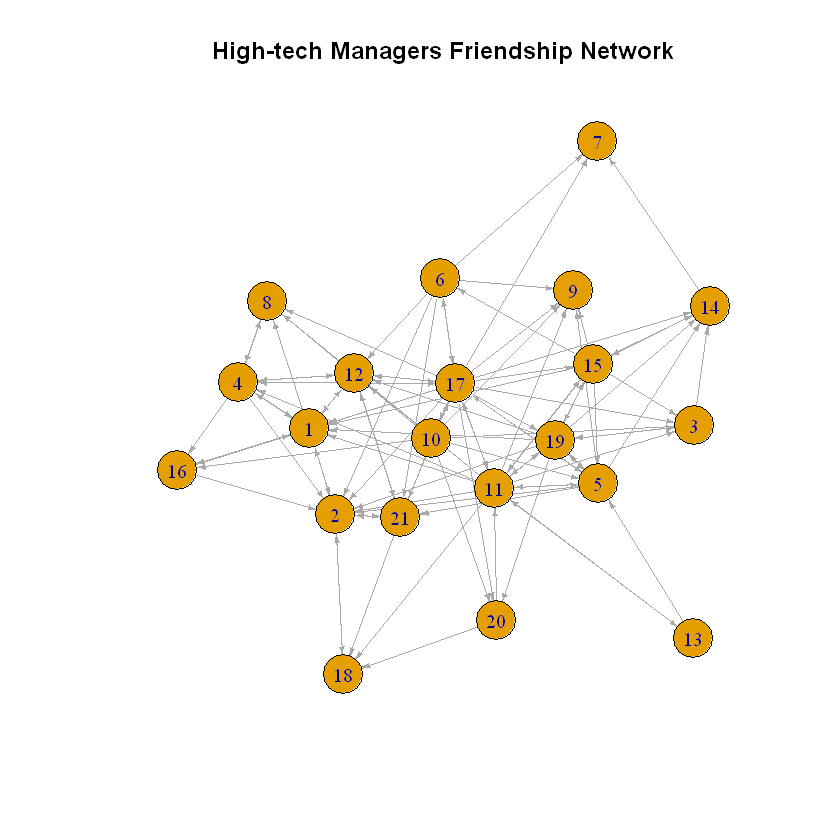

In [46]:
# To view the plot without saving it:
plot(friendship_net,
     edge.arrow.size=.3,
     main="High-tech Managers Friendship Network")

Check the documentation of the jpeg() function to see
how you can customise the image dimension, quality, ..

Finally, the reports-to network

In [47]:
jpeg("graphs/1.3_Krackhardt_Reports.jpg")
plot(reports_to_net,
     edge.arrow.size=.3,
     main="High-tech Managers Reports-to Network")
dev.off()

png 
  2

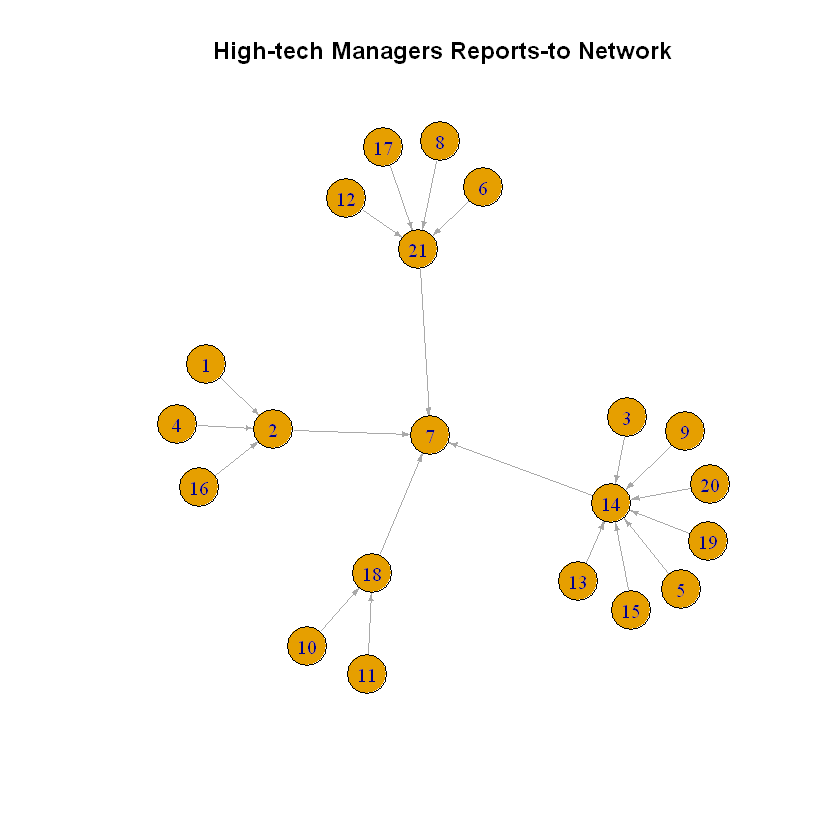

In [48]:
# View without saving plot:
plot(reports_to_net,
     edge.arrow.size=.3,
     main="High-tech Managers Reports-to Network")

We can optimize the layout by applying a layout 
algorithm to the specific set of ties we care about. 
The above graphs were plotted using the Fruchterman-Rheingold
algorithm (the default one). Other options are described in 
the igraph help page for ```layout_```:

In [49]:
?layout_

Now we'll use the layout generated for the Reports-to network
to plot the friendship ties. The idea is to try to (visually) 
explore how well friendship relations go along the official 
organisational structure (reflected in the reports_to relation).

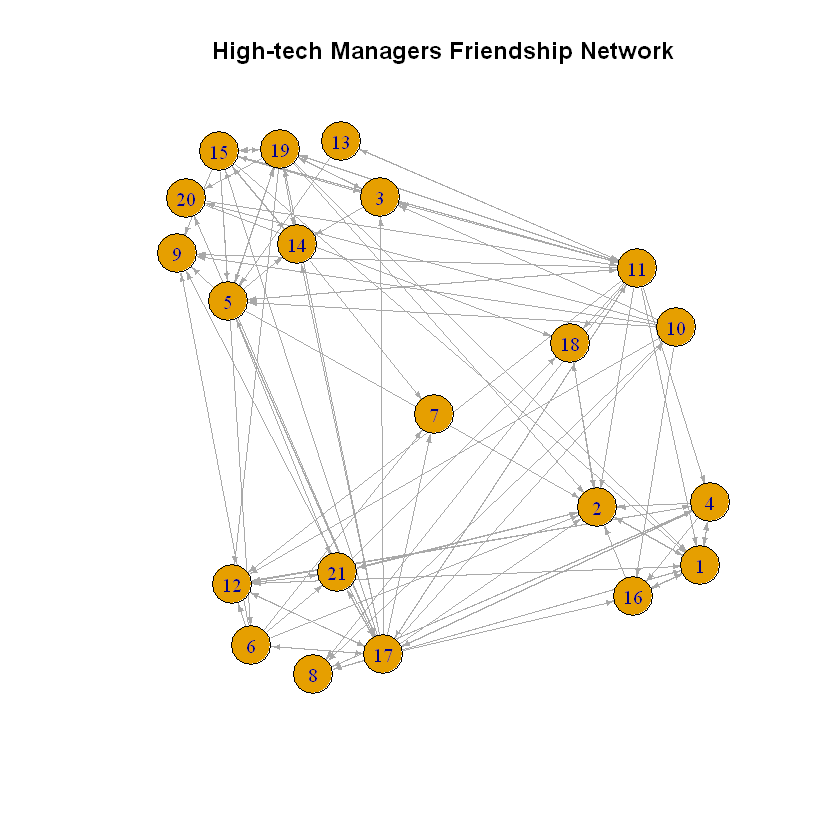

In [50]:
reports_to_layout <- layout_nicely(reports_to_net)
plot(friendship_net, 
     layout=reports_to_layout,
     edge.arrow.size=.3,
     main="High-tech Managers Friendship Network")

Now let's color-code vertices by department 
Check the possible values for the 'DEPT' attribute

In [51]:
unique(V(friendship_net)$DEPT)

[1] 4 2 1 0 3

Initiate the vector of node colors:

In [52]:
dept_vertex_colors <- V(friendship_net)$DEPT + 1

Select a color palette using the ColorBrewer (http://colorbrewer2.org) 

In [53]:
colors <- c('#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3')

Associate department numbers with colors from the 'colors' palette


In [54]:
dept_vertex_colors <- sapply(dept_vertex_colors, function(x) colors[x])

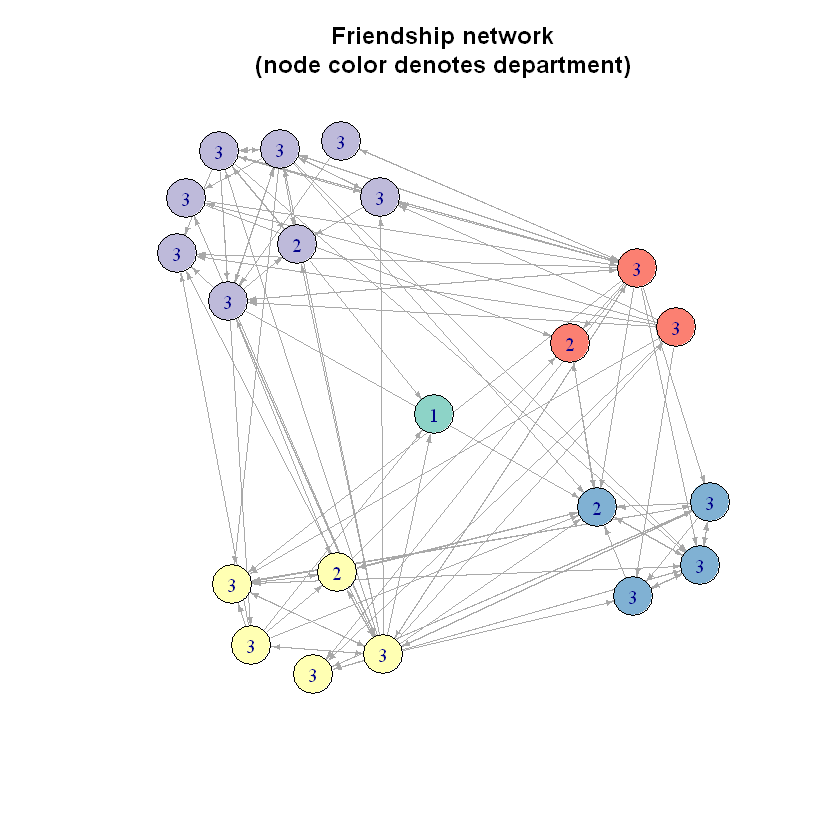

In [55]:
plot(friendship_net, 
    layout=reports_to_layout, 
    vertex.color=dept_vertex_colors, # setting node color
    vertex.label=V(friendship_net)$LEVEL, # using organisational level as the vertex label
    edge.arrow.size=.3,
    main="Friendship network\n(node color denotes department)")

Now let's make the vertex size proportional to the actors' tenure:

In [56]:
tenure_vertex_sizes <- V(friendship_net)$TENURE
summary(tenure_vertex_sizes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.250   7.500   9.333  11.746  12.500  30.000 

There is a large difference between the min and max values, which will not  
'translate' well into visual depiction of the graph. So, we will somewhat
'smooth' the difference
Some ideas how this "smoothing" can be done, are given in this post:
https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16

In [57]:
tenure_vertex_sizes <- log(tenure_vertex_sizes + 1) * 8
summary(tenure_vertex_sizes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.785  17.121  18.683  18.728  20.822  27.472 

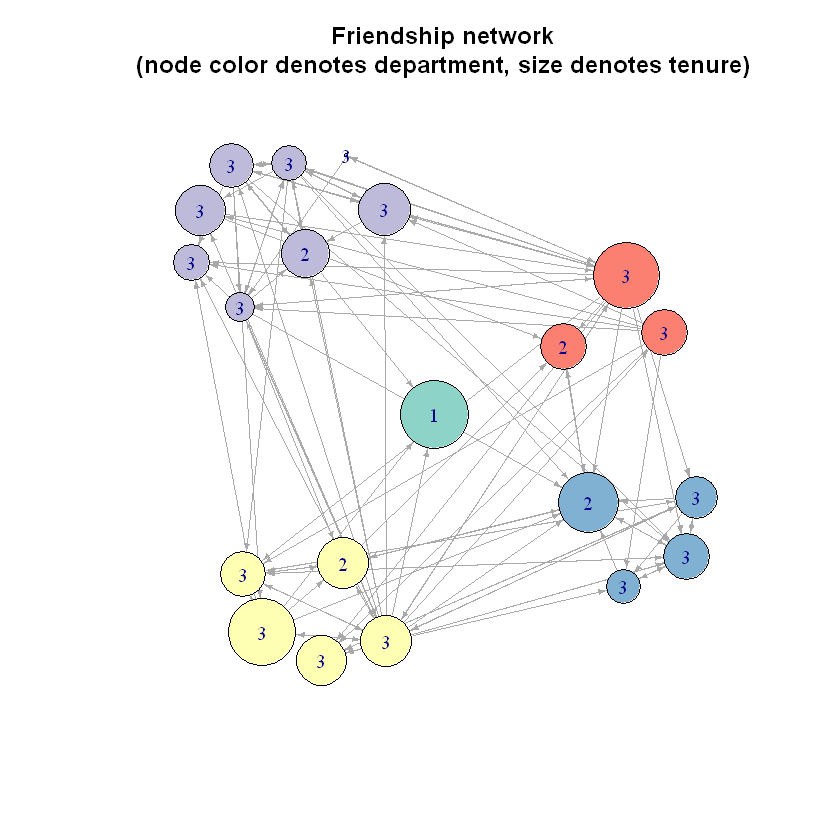

In [58]:
plot(friendship_net, 
     layout=reports_to_layout, 
     vertex.color=dept_vertex_colors, 
     vertex.label=V(friendship_net)$LEVEL,
     edge.arrow.size=.3,
     vertex.size=tenure_vertex_sizes, # setting the vertex size
     main="Friendship network\n(node color denotes department, size denotes tenure)")

We can also add visualization related attributes directly to a graph, 
that is, as attributes of the graph's vertices and edges. 
Since such attributes serve only for visualizing a graph, we will first 
replicate the graph, and add the visualisation attributes to the replicated one,
thus avoiding to 'burden' the 'main' graph with visual details.

In [59]:
friendship_viz <- friendship_net
E(friendship_viz)$arrow.size <- .3 
E(friendship_viz)$color <- '#4496eb' # (a variant of) blue as the edge color
V(friendship_viz)$size <- tenure_vertex_sizes
V(friendship_viz)$color <- dept_vertex_colors 
V(friendship_viz)$frame <- '#3e3e8c' # dark blue as the color of the edge/frame of all vertices

Since we have added the visualization related attributes
to the graph object directly, we can visualize it without
specifying any parameters to the plot() function

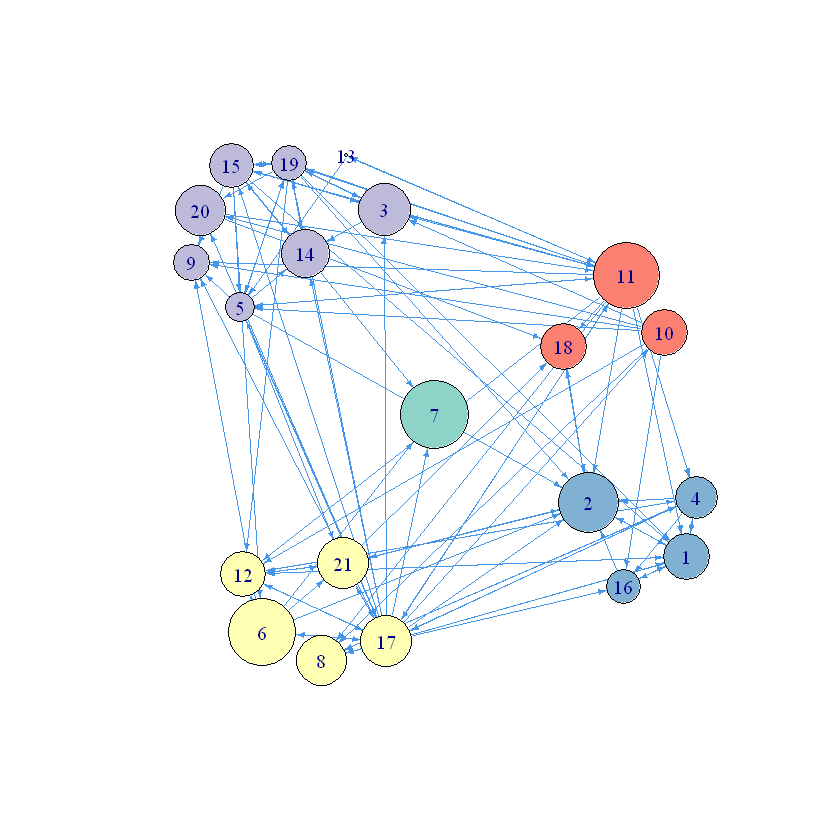

In [60]:
plot(friendship_viz, layout=reports_to_layout)

#### Task 1

Use network visualisations to explore the similarities and differences of 
the advice and reports-to networks. To do that, follow a procedure similar to  
the one used above for comparing / contrasting friendship and reports-to networks. 

#### 5. EXPORT THE NETWORK

In [64]:
output_dir <- "output/lab1/"
if(file.exists(output_dir)==FALSE) 
    dir.create(file.path(getwd(), output_dir), recursive = TRUE)

The write.graph() function exports a graph object in various
formats readable by other programs. For example, a graph can be
exported in the 'graphml' format and imported in Gephi for 
visualisation.


In [65]:
write.graph(advice_net, file='output/lab1/krack_advice_net.graphml', format="graphml")

For a more general file type (e.g., importable to Excel),
use the "edgelist" format. Note that this file format will keep
neither node nor tie attributes; only the edges will be stored.

In [66]:
write.graph(advice_net, file='output/lab1/krack_advice.txt', format="edgelist")

We can also save graphs as RData files. This is the best option if we intend
to further process graphs in R, since this format will keep all the specific
characteristics of the graph objects that we have created.

In [68]:
saveRDS(advice_net, "output/lab1/krack_advice.RData")
saveRDS(friendship_net, "output/lab1/krack_friendship.RData")
saveRDS(reports_to_net, "output/lab1/krack_reports_to.RData")